# Particle Filter
## Task 1
Create the Particle set of size $N=1000$ and with equal weights, given that $x\sim \mathcal{N}(0,1)$.

Plot the histogram of values.

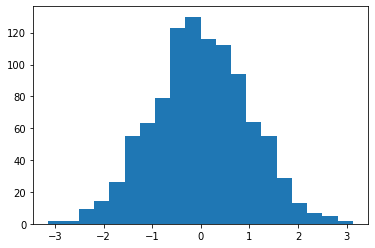

In [56]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
particles = np.random.normal(0, 1, size=N)

plt.hist(particles, bins=20)
plt.show()

## Task 2
Propagate the particle set, given the following 1d system: $y = (x+\eta)^2$, where $\eta\sim\mathcal{N}(0,2)$ and obtain $\bar{\text{bel}}(y)$

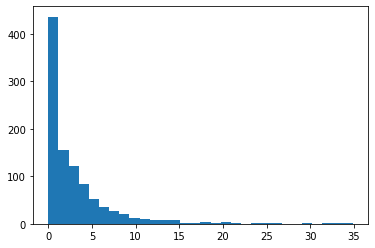

In [51]:

weights = np.ones(N) / N
eta = np.random.normal(0, np.sqrt(2), 1000)
y = (particles + eta) ** 2 

y_mean = y.mean()
y_std = y.std()
plt.hist(y, bins=30)
plt.show()


## Task 3
Now, let's consider the observation function $z = h(y,\delta) = y + \delta$ where the probablistic model is $z \sim \mathcal{N}(z;h(y),2^2)$ and the observation $z=5$. Calculate the new weighs of the particle set that represent the posterior belief $\text{bel}(y)$

What can you say about this PDF?

In [54]:
from scipy.stats import norm
import scipy.integrate

z = 5
def numeric_posterior(z, y):
    likelihood = lambda y: norm(loc=y, scale=2).pdf(z)
    return likelihood(y)

In [55]:
new_weights = numeric_posterior(z, y) 
new_weights /= new_weights.sum()
print(y_mean)
print((y * new_weights).sum())

2.995294771312755
3.7561569972879325


In [58]:
new_weights[new_weights < 1e-3].shape


(641,)

Q: What is the mean of the new particle set?

Q: How many particles have a small weight (<1e-3 for instance)? How can this be a problem?